In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
from plotnine import ggplot, aes, geom_line,geom_point,geom_smooth,geom_hline,scale_color_manual,ggsave,themes,labs,element_rect,element_blank,theme,element_text, scale_y_date, scale_y_continuous
theme_sra = themes.theme_minimal(base_size=9, base_family="Tahoma")
import os
os.environ["R_HOME"] = "C:\\Program Files\\R\\R-4.3.2\\"
%reload_ext rpy2.ipython

fig_DIR = "../figs/pbp_related/"

c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\nba-ub9Z_EQq-py3.11\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.


# Game Logs

In [12]:
def get_game_logs_player(player,season="2023-24"):
    url = "https://api.pbpstats.com/get-game-logs/nba"
    pID = get_pID(player)
    params = {"Season": season, "SeasonType": "Regular Season", "EntityId": pID, "EntityType": "Player" }
    response = requests.get(url, params=params)
    response_json = response.json()
    totals = response_json['single_row_table_data']
    game_logs = response_json['multi_row_table_data']
    data =  pd.json_normalize(game_logs)
    df = data
    df["Games"] = df.reset_index().index +1
    df["Minutes"] = pd.to_datetime(df["Minutes"],format="%M:%S")
    return df,totals

## Usage

### Westbrook Usage

In [ ]:
player = "Russell Westbrook"
season = "2019-20,2020-21,2021-22,2022-23,2023-24"
df,totals = get_game_logs_player(player,season=season)


In [ ]:
# df2 = df.assign(values = pd.Categorical(df1["Team"], ["HOU","WAS","LAL","LAC"]))
# df2["Team"] = df2["values"]
print(df.filter(regex='FG2A').columns)

In [ ]:
%%R -i df -w 5 -h 4 --units in -r 150
library(ggplot2)
library(dplyr)
library(nbastatR)

# custom ggplot2 theme
theme_owen <- function () { 
  theme_minimal(base_size=9, base_family="Consolas") %+replace% 
    theme(
      panel.grid.minor = element_blank(),
      plot.background = element_rect(fill = 'ghostwhite', color = "ghostwhite")
    )
}

df$Date <- as.Date(df$Date)
df$Team <- factor(df$Team, levels = c("HOU", "WAS", "LAL","LAC"))
# Most basic bubble plot
p <- ggplot(df, aes(x=Games, y=Usage,color=Team)) +
  # geom_line() + 
  geom_point() +
  geom_smooth(method="loess") +
  # geom_text(aes(label=Team), size=3) +
  geom_hline(yintercept=30, linetype="dashed", color="black", linewidth=0.5) +
  scale_color_manual(values = c("#CE1141", "#002B5C", "#FDB927","#006BB6")) +
  theme_owen() +
  theme(plot.title.position = 'plot', 
        plot.title = element_text(face = 'bold'), 
        plot.margin = margin(10, 10, 15, 10)) +
  theme(axis.text.x = element_text(size=10, face="bold", color = "black"),
        axis.text.y = element_text(size=10, face="bold", color = "black"),
        axis.title.x = element_text(size=12, face="bold", colour = "black"),
        axis.title.y = element_text(size=12, face="bold", colour = "black")) +
  labs(x = "Games Played Since Houston", 
       y = "Usage", 
       title = "Russell Westbrook Usage Trends Since Houston",
       subtitle = "Was Westbrook not given a chance to be productive with the Lakers?")

ggsave("../figs/pbp_related/Russ_Usage_Trends.png", p, w = 8, h = 5, dpi = 600)

In [ ]:
player = "Scottie Barnes"
season = "2019-20,2020-21,2021-22,2022-23,2023-24"
df,totals = get_game_logs_player(player,season=season)
p = (
    ggplot(df1)  # What data to use
    + aes(x="Games", y="Usage")  # What variable to use
    # + geom_line()  # Geometric object to use for drawing
    + geom_point(color="#CE1141") 
    + geom_smooth(method="loess",color="Black", size=2) 
    + labs(x = "Games Played", 
       y = "Usage", 
       title = "Scottie Barnes Usage Trends",)
    + theme_sra
    + theme(
      panel_grid_minor = element_blank(),
      plot_background = element_rect(fill = 'ghostwhite', color = "ghostwhite"))
    + theme(
        plot_title = element_text(face = 'bold',size=14))
    + theme(axis_text_x = element_text(size=10, face="bold", color = "black"),
        axis_text_y = element_text(size=10, face="bold", color = "black"),
        axis_title_x = element_text(size=12, face="bold", colour = "black"),
        axis_title_y = element_text(size=12, face="bold", colour = "black")) 
    # + geom_hline(yintercept=30, linetype="dashed", color="black", size=0.5) 
)
p.save(fig_DIR+"Scottie_Usage.png",width=8,height=5,dpi=600)
p.draw()

## 2PT FGA Trends

In [3]:
def get_season_str(start,end):
    seasons = np.arange(start,end,1)
    seasons_str = ""
    for season in seasons:
        season_str = str(season) + "-" + str(season+1)[-2:]
        seasons_str += season_str + ","
    return seasons_str[:-1]

In [13]:
player = "LeBron James"
season = get_season_str(2003,2024)
df,totals = get_game_logs_player(player,season=season)

In [5]:
print(df.filter(regex='As').columns)

Index(['PtsAssisted2s', 'TwoPtAssists', 'ThreePtAssists', 'Assists',
       'Corner3Assists', 'AtRimAssists', 'ShortMidRangeAssists',
       'LongMidRangeAssists', 'AssistPoints', 'Assisted2sPct',
       'NonPutbacksAssisted2sPct', 'ShortMidRangePctAssisted',
       'LongMidRangePctAssisted', 'PtsAssisted3s', 'Arc3Assists',
       'Assisted3sPct', 'AtRimPctAssisted', 'Corner3PctAssisted',
       'SecondChanceCorner3PctAssisted', 'Arc3PctAssisted',
       'SecondChanceArc3PctAssisted', 'SecondChanceAtRimPctAssisted'],
      dtype='object')


c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\nba-ub9Z_EQq-py3.11\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\nba-ub9Z_EQq-py3.11\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: ../figs/pbp_related/LeBron James_AssistPoints.png
c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\nba-ub9Z_EQq-py3.11\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\nba-ub9Z_EQq-py3.11\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


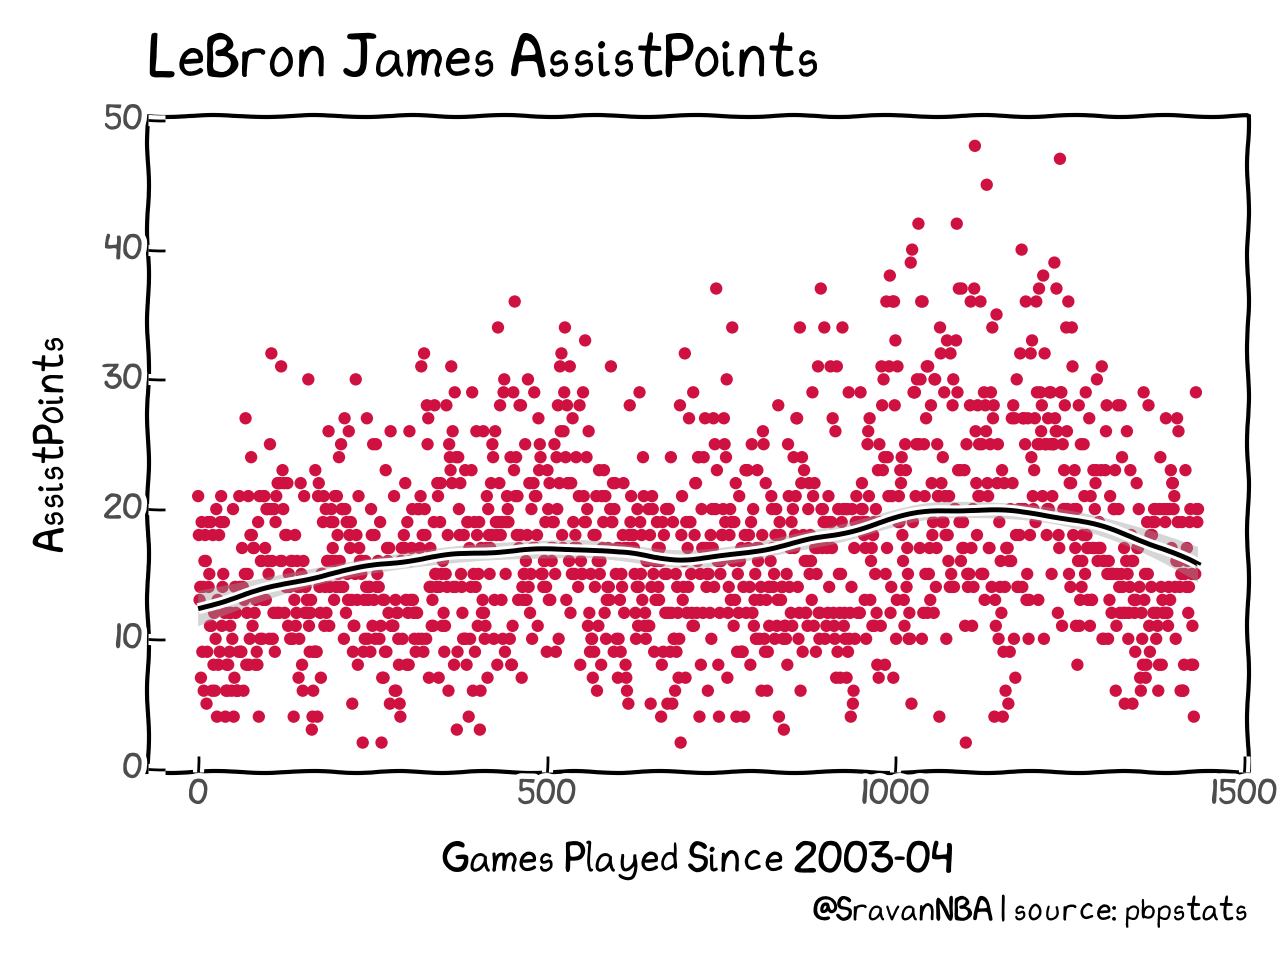

In [9]:
var,y = "AssistPoints", "AssistPoints"
# var,y = "Minutes", "Minutes Played"
title = player+ " " + y
p = (
    ggplot(df)  # What data to use
    + aes(x="Games", y=var)  # What variable to use
    # + geom_line()  # Geometric object to use for drawing
    # + scale_y_continuous( breaks = [10,20,30,40,50,60] )
    + geom_point(color="#CE1141") 
    + geom_smooth(method="loess",color="black") 
    # + scale_y_date(date_labels = "%M:%S")
    # + geom_hline(yintercept=0.575, linetype="dashed", color="black", size=0.5) 
    + labs(x = "Games Played Since 2003-04", 
       y = y, 
       title = title,
       caption = "@SravanNBA | source: pbpstats")
    + themes.theme_xkcd(base_size=14)
    + theme(
        plot_title = element_text(face = 'bold',size=20), 
        plot_margin = 0.025
        )
)
p.save(fig_DIR+ player +"_" +var+ ".png",dpi=300)#,height=4,width=5)
p.draw()

In [ ]:
p = (
    ggplot(df)  # What data to use
    + aes(x="Games", y="FG2A")  # What variable to use
    # + geom_line()  # Geometric object to use for drawing
    + geom_point(color="#CE1141") 
    + geom_smooth(method="loess",color="#CE1141") 
    + labs(x = "Games Played Since 2019-20", 
       y = "Attempts", 
       title = "LeBron James 2PT Field Goal Attempts since 2019-20",)
    + theme_sra
    + theme(
      panel_grid_minor = element_blank(),
      plot_background = element_rect(fill = 'floralwhite', color = "floralwhite"))
    + theme(
        plot_title = element_text(face = 'bold',size=14), 
        # plot_margin = [10, 10, 15, 10]
        )
    + theme(axis_text_x = element_text(size=10, face="bold", color = "black"),
        axis_text_y = element_text(size=10, face="bold", color = "black"),
        axis_title_x = element_text(size=12, face="bold", colour = "black"),
        axis_title_y = element_text(size=12, face="bold", colour = "black")) 
    # + geom_hline(yintercept=30, linetype="dashed", color="black", size=0.5) 
)
p.save(fig_DIR+"lebron_2FGA.png",dpi=600)
p.draw()

## True Shooting Trends

In [76]:
player = "James Harden"
season = "2023-24"
df,totals = get_game_logs_player(player,season=season)

In [77]:
# print(df.filter(regex='M').columns)

c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\nba-ub9Z_EQq-py3.11\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\pansr\AppData\Local\pypoetry\Cache\virtualenvs\nba-ub9Z_EQq-py3.11\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: ../figs/pbp_related/James Harden_TsPct.png


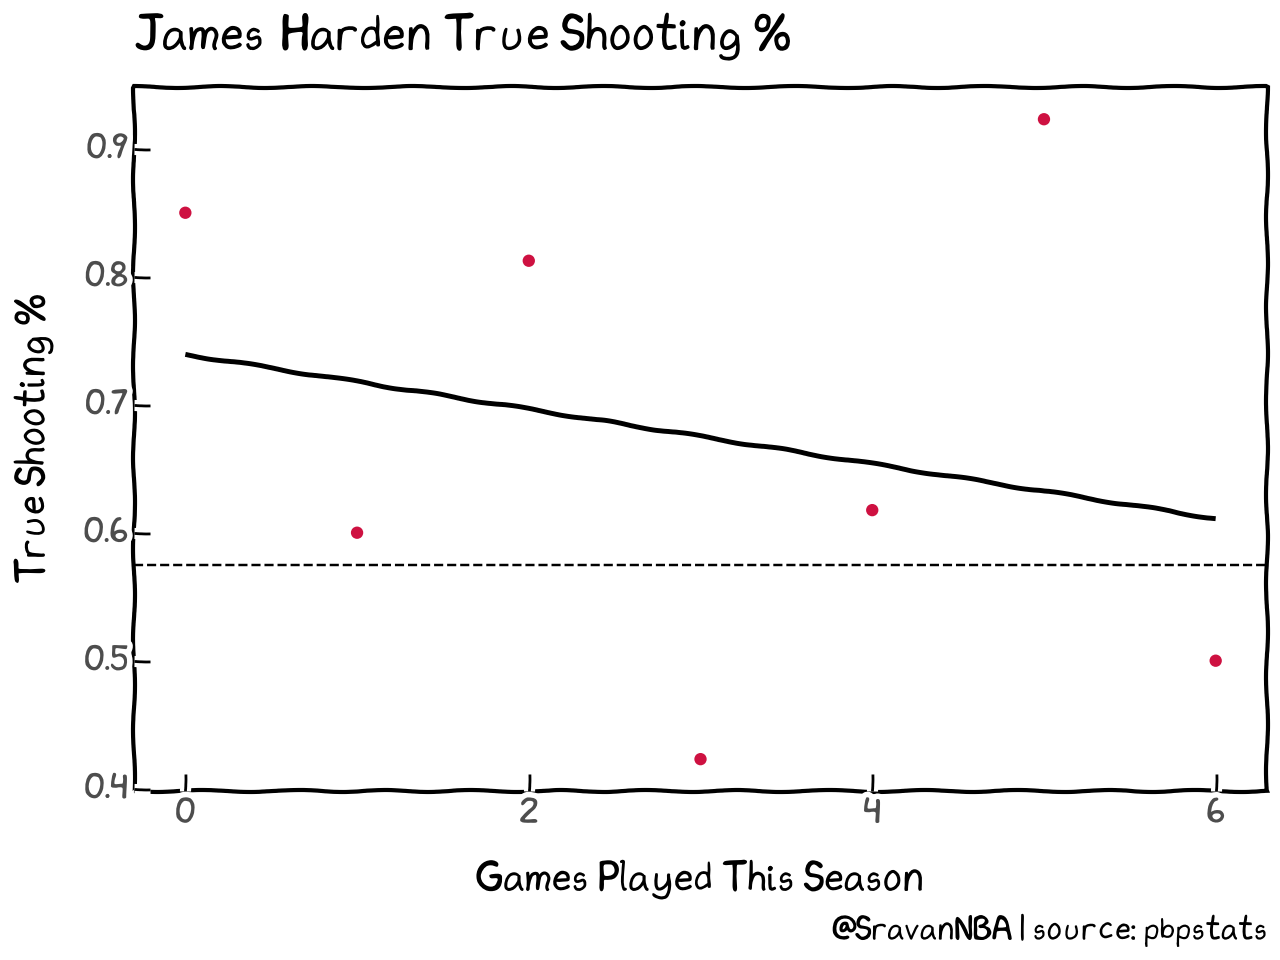

In [78]:
var,y = "TsPct", "True Shooting %"
# var,y = "Minutes", "Minutes Played"
title = player+ " " + y
p = (
    ggplot(df)  # What data to use
    + aes(x="Games", y=var)  # What variable to use
    # + geom_line()  # Geometric object to use for drawing
    + geom_point(color="#CE1141") 
    + geom_smooth(method="lm",color="black",se=False) 
    # + scale_y_date(date_labels = "%M:%S")
    + geom_hline(yintercept=0.575, linetype="dashed", color="black", size=0.5) 
    + labs(x = "Games Played This Season", 
       y = y, 
       title = title,
       caption = "@SravanNBA | source: pbpstats")
    + themes.theme_xkcd(base_size=14)
)
p.save(fig_DIR+ player +"_" +var+ ".png",dpi=300)
p.draw()

In [79]:
xcvxc

NameError: name 'xcvxc' is not defined

# Get All Season Stats

In [ ]:
def get_all_seasons_player(player):
    url = "https://api.pbpstats.com/get-all-season-stats/nba"
    pID = get_pID(player)
    params = {"EntityId": pID, "EntityType": "Player"}
    response = requests.get(url, params=params)
    response_json = response.json()
    data =  pd.json_normalize(response_json)
    df_playoffs = pd.json_normalize(data["results.Playoffs"][0])
    df_regular = pd.json_normalize(data["results.Regular Season"][0])
    
    return df_regular,df_playoffs

In [ ]:
theme_sra = themes.theme_minimal(base_size=9, base_family="Tahoma")
theme_sra += theme(
            panel_grid_minor = element_blank(),
            plot_background = element_rect(fill = 'ghostwhite', color = "ghostwhite"),
            plot_title = element_text(face = 'bold',size=14),
            axis_text_x = element_text(size=10, face="bold", color = "black"),
            axis_text_y = element_text(size=10, face="bold", color = "black"),
            axis_title_x = element_text(size=12, face="bold", colour = "black"),
            axis_title_y = element_text(size=12, face="bold", colour = "black")
      )

In [ ]:
player ="Russell Westbrook"
df_regular,df_playoffs = get_all_seasons_player(player)
df_regular.drop(df_regular.index[-2],axis=0,inplace=True)

In [ ]:
var = "Usage"
p = (
    ggplot(df_regular)  # What data to use
    + aes(x="Season", y=var)  # What variable to use
    + geom_line( group = 1)  # Geometric object to use for drawing
    + geom_point(color="#CE1141",size=5) 
    + labs(x = "Season", 
       y = var, 
       title = player,)
    + theme_sra
    # + geom_hline(yintercept=30, linetype="dashed", color="black", size=0.5) 
)
p.save(fig_DIR+f"{player}_{var}.png",height=5,width=12,dpi=600, verbose = False)
p.draw()